In [29]:
import numpy as np
import os
import io
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
import math

In [5]:
### PCA with original data

### find current directory
cwd = os.path.abspath(os.getcwd())
with open(cwd + '/p2_unsupervised/X.npy', 'rb') as file:
    X_data = np.load(file)
    print(X_data.shape)
    #print(X_data)

    # largest_col1 = np.max(X_data[:, 0])
    # print(np.max(X_data[:, 0]))
    # #print(X_data[:, 0])
    # log2_largest_col1 = np.log2(largest_col1+1)
    # print(log2_largest_col1)

    # ### transform data with log2
    # log2_X_data = np.log2(X_data)

    ### PCA on the original data
    pca40 = PCA(n_components=40)
    pca_X = pca40.fit(X_data)
    pca40_var_ratio = pca40.explained_variance_ratio_
    print(pca40_var_ratio)

    # ### PCA on the tranformed data (log2)
    # pca2 = PCA(n_components=40)
    # pca_logX= pca2.fit(log2_X_data)
    # pca2_var_ratio = pca2.explained_variance_ratio_
    # print(pca2.explained_variance_ratio_)

    pca40_cumsum = np.cumsum(pca40_var_ratio)
    print(pca40_cumsum)

    pca40_significant = pca40_cumsum > 0.85
    #print(pca1_significant)

    pca40_first_element = np.argwhere(pca40_significant)[0] + 1
    print(pca40_first_element)




(2169, 45768)
[0.42638226 0.12335797 0.09455419 0.06873865 0.03744362 0.0291063
 0.0223902  0.01448669 0.01144518 0.00841982 0.00711905 0.00679265
 0.00543832 0.00482218 0.00431007 0.00408865 0.00378165 0.00348869
 0.00298403 0.00290655 0.00272847 0.00237687 0.00229408 0.00214733
 0.00204642 0.00190367 0.00179057 0.00164683 0.00160526 0.00140202
 0.00138568 0.00127996 0.0012347  0.00116247 0.00110337 0.0010763
 0.00102516 0.00097805 0.00092635 0.00092429]
[0.42638226 0.54974023 0.64429442 0.71303307 0.75047669 0.77958299
 0.80197319 0.81645988 0.82790506 0.83632487 0.84344392 0.85023657
 0.8556749  0.86049707 0.86480714 0.86889579 0.87267743 0.87616613
 0.87915016 0.88205671 0.88478518 0.88716205 0.88945612 0.89160345
 0.89364987 0.89555354 0.8973441  0.89899094 0.9005962  0.90199822
 0.9033839  0.90466385 0.90589856 0.90706103 0.9081644  0.9092407
 0.91026586 0.91124391 0.91217026 0.91309455]
[12]


In [8]:
with open(cwd + '/p2_unsupervised/X.npy', 'rb') as file:
    X_data = np.load(file)
    print(X_data.shape)

    log2_X_data = np.where(X_data != 0.0, np.log2(X_data+1), 0)
    #print(log2_X_data)

    ### PCA on the transformed data data
    pca40_var_ratio = PCA(n_components=40)
    pca_log2X= pca40_var_ratio.fit(log2_X_data)
    pca40_var_ratio = pca40_var_ratio.explained_variance_ratio_
    print(pca40_var_ratio)


    pca40_cumsum = np.cumsum(pca40_var_ratio)
    print(pca40_cumsum)

    pca40_significant = pca40_cumsum > 0.85
    #print(pca40_significant)

    # pca40_first_element = np.argwhere(pca40_significant)[0] +1
    # print(pca40_first_element)

    # largest_col1 = np.max(log2_X_data[:, 0])
    # print(largest_col1)

(2169, 45768)
[0.15494937 0.04430162 0.0175636  0.01135883 0.00904332 0.00882154
 0.00709387 0.00638666 0.00604963 0.00583731 0.00545677 0.00443407
 0.00406868 0.0035825  0.0032566  0.00289693 0.00286168 0.00278559
 0.00257841 0.00225329 0.00188919 0.00166909 0.0016195  0.00147749
 0.00142065 0.00132169 0.00127503 0.00124849 0.00115497 0.00112314
 0.00108023 0.00105732 0.0010488  0.00099521 0.00093683 0.00090128
 0.00086345 0.00083004 0.00081755 0.00080563]
[0.15494937 0.19925099 0.2168146  0.22817342 0.23721675 0.24603829
 0.25313216 0.25951882 0.26556845 0.27140577 0.27686254 0.28129661
 0.2853653  0.2889478  0.2922044  0.29510133 0.29796301 0.30074859
 0.30332701 0.30558029 0.30746948 0.30913857 0.31075807 0.31223556
 0.31365621 0.3149779  0.31625293 0.31750142 0.31865639 0.31977953
 0.32085977 0.32191709 0.32296589 0.3239611  0.32489793 0.3257992
 0.32666265 0.32749269 0.32831025 0.32911588]


In [9]:
print(log2_X_data)
print(log2_X_data[0, :])

[[0.         0.         6.66380275 ... 0.         0.         0.        ]
 [0.         0.         6.52174476 ... 0.         0.         0.        ]
 [0.         0.         6.51399449 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[0.         0.         6.66380275 ... 0.         0.         0.        ]


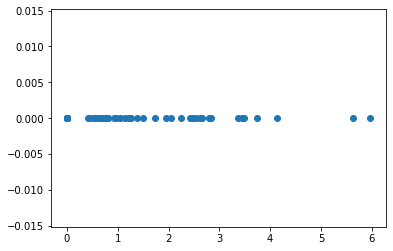

In [10]:
# Scatter plot
#plt.scatter(X_data[0, :], X_data[1, :])
plt.scatter(log2_X_data[:, 0], log2_X_data[:, 1])

# Display the plot
plt.show()

(2169, 45768)
(2169, 40)


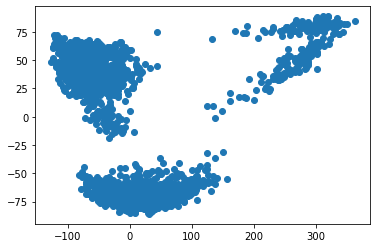

In [11]:
pca3 = PCA(n_components=40)
pca3.fit(log2_X_data)
log2_X_pca = pca3.transform(log2_X_data)

print(log2_X_data.shape)
print(log2_X_pca.shape)


# Scatter plot
plt.scatter(log2_X_pca[:, 0], log2_X_pca[:, 1])

# Display the plot
plt.show()

(2169, 45768)
(2169, 2)


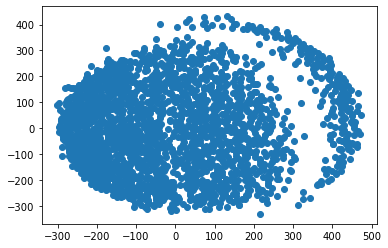

In [12]:
mds = MDS(n_components=2)
mds.fit(log2_X_data)
log2_X_mds = mds.fit_transform(log2_X_data)

print(log2_X_data.shape)
print(log2_X_mds.shape)


# Scatter plot
plt.scatter(log2_X_mds[:, 0], log2_X_mds[:, 1])

# Display the plot
plt.show()

(2169, 45768)
(2169, 10)
(2169, 45768)
(2169, 2)


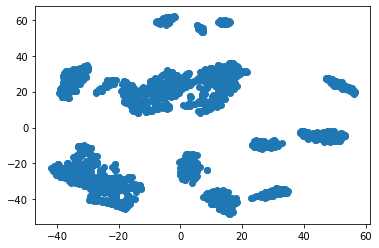

In [131]:
pca10 = PCA(n_components=10)
pca10.fit(log2_X_data)
log2_X_pca10 = pca10.transform(log2_X_data)

print(log2_X_data.shape)
print(log2_X_pca10.shape)

tsne = TSNE(n_components=2, perplexity=40)
tsne.fit(log2_X_pca10)
log2_X_tsne = tsne.fit_transform(log2_X_pca10)

print(log2_X_data.shape)
print(log2_X_tsne.shape)


# Scatter plot
plt.scatter(log2_X_tsne[:, 0], log2_X_tsne[:, 1])

# Display the plot
plt.show()

(2169, 45768)
(2169, 50)
(2169, 45768)
(2169, 2)


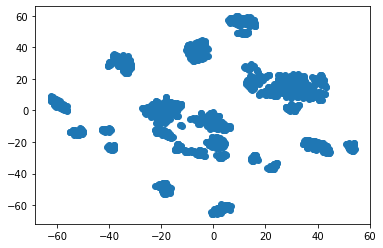

In [13]:
pca50 = PCA(n_components=50)
pca50.fit(log2_X_data)
log2_X_pca50 = pca50.transform(log2_X_data)

print(log2_X_data.shape)
print(log2_X_pca50.shape)

tsne = TSNE(n_components=2, perplexity=40)
tsne.fit(log2_X_pca50)
log2_X_tsne = tsne.fit_transform(log2_X_pca50)

print(log2_X_data.shape)
print(log2_X_tsne.shape)


# Scatter plot
plt.scatter(log2_X_tsne[:, 0], log2_X_tsne[:, 1])

# Display the plot
plt.show()

(2169, 45768)
(2169, 100)
(2169, 45768)
(2169, 2)


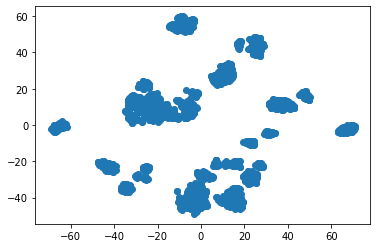

In [128]:
pca100 = PCA(n_components=100)
pca100.fit(log2_X_data)
log2_X_pca100 = pca100.transform(log2_X_data)

print(log2_X_data.shape)
print(log2_X_pca100.shape)

tsne = TSNE(n_components=2, perplexity=40)
tsne.fit(log2_X_pca100)
log2_X_tsne = tsne.fit_transform(log2_X_pca100)

print(log2_X_data.shape)
print(log2_X_tsne.shape)


# Scatter plot
plt.scatter(log2_X_tsne[:, 0], log2_X_tsne[:, 1])

# Display the plot
plt.show()

(2169, 45768)
(2169, 250)
(2169, 45768)
(2169, 2)


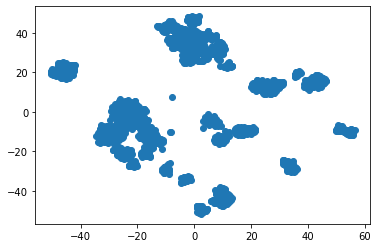

In [130]:
pca250 = PCA(n_components=250)
pca250.fit(log2_X_data)
log2_X_pca250 = pca250.transform(log2_X_data)

print(log2_X_data.shape)
print(log2_X_pca250.shape)

tsne = TSNE(n_components=2, perplexity=40)
tsne.fit(log2_X_pca250)
log2_X_tsne = tsne.fit_transform(log2_X_pca250)

print(log2_X_data.shape)
print(log2_X_tsne.shape)


# Scatter plot
plt.scatter(log2_X_tsne[:, 0], log2_X_tsne[:, 1])

# Display the plot
plt.show()

(2169, 45768)
(2169, 500)
(2169, 45768)
(2169, 2)


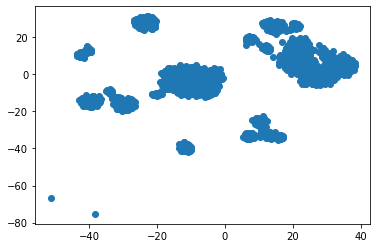

In [133]:
pca500 = PCA(n_components=500)
pca500.fit(log2_X_data)
log2_X_pca500 = pca500.transform(log2_X_data)

print(log2_X_data.shape)
print(log2_X_pca500.shape)

tsne = TSNE(n_components=2, perplexity=40)
tsne.fit(log2_X_pca500)
log2_X_tsne = tsne.fit_transform(log2_X_pca500)

print(log2_X_data.shape)
print(log2_X_tsne.shape)


# Scatter plot
plt.scatter(log2_X_tsne[:, 0], log2_X_tsne[:, 1])

# Display the plot
plt.show()

(2169, 45768)
(2169, 50)
(2169, 45768)
(2169, 2)


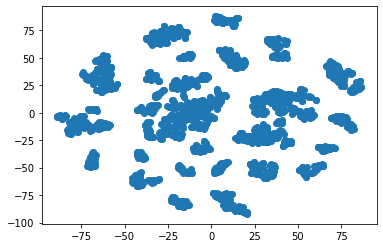

In [135]:
## perplexity

pca50 = PCA(n_components=50)
pca50.fit(log2_X_data)
log2_X_pca50 = pca50.transform(log2_X_data)

print(log2_X_data.shape)
print(log2_X_pca50.shape)

tsne = TSNE(n_components=2, perplexity=10)
tsne.fit(log2_X_pca50)
log2_X_tsne = tsne.fit_transform(log2_X_pca50)

print(log2_X_data.shape)
print(log2_X_tsne.shape)


# Scatter plot
plt.scatter(log2_X_tsne[:, 0], log2_X_tsne[:, 1])

# Display the plot
plt.show()

(2169, 45768)
(2169, 50)
(2169, 45768)
(2169, 2)


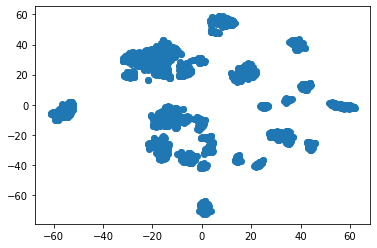

In [136]:
## perplexity

pca50 = PCA(n_components=50)
pca50.fit(log2_X_data)
log2_X_pca50 = pca50.transform(log2_X_data)

print(log2_X_data.shape)
print(log2_X_pca50.shape)

tsne = TSNE(n_components=2, perplexity=40)
tsne.fit(log2_X_pca50)
log2_X_tsne = tsne.fit_transform(log2_X_pca50)

print(log2_X_data.shape)
print(log2_X_tsne.shape)


# Scatter plot
plt.scatter(log2_X_tsne[:, 0], log2_X_tsne[:, 1])

# Display the plot
plt.show()

(2169, 45768)
(2169, 50)
(2169, 45768)
(2169, 2)


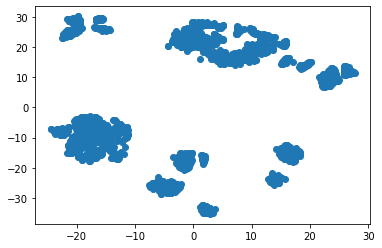

In [137]:
## perplexity

pca50 = PCA(n_components=50)
pca50.fit(log2_X_data)
log2_X_pca50 = pca50.transform(log2_X_data)

print(log2_X_data.shape)
print(log2_X_pca50.shape)

tsne = TSNE(n_components=2, perplexity=120)
tsne.fit(log2_X_pca50)
log2_X_tsne = tsne.fit_transform(log2_X_pca50)

print(log2_X_data.shape)
print(log2_X_tsne.shape)


# Scatter plot
plt.scatter(log2_X_tsne[:, 0], log2_X_tsne[:, 1])

# Display the plot
plt.show()

(2169, 45768)
(2169, 50)
(2169, 45768)
(2169, 2)


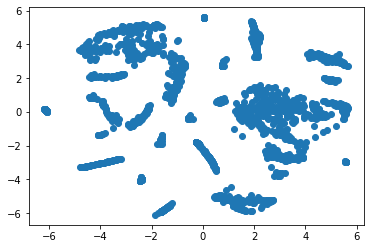

In [138]:
## learning rate

pca50 = PCA(n_components=50)
pca50.fit(log2_X_data)
log2_X_pca50 = pca50.transform(log2_X_data)

print(log2_X_data.shape)
print(log2_X_pca50.shape)

tsne = TSNE(n_components=2, perplexity=40, learning_rate=0.1)
tsne.fit(log2_X_pca50)
log2_X_tsne = tsne.fit_transform(log2_X_pca50)

print(log2_X_data.shape)
print(log2_X_tsne.shape)


# Scatter plot
plt.scatter(log2_X_tsne[:, 0], log2_X_tsne[:, 1])

# Display the plot
plt.show()

(2169, 45768)
(2169, 50)
(2169, 45768)
(2169, 2)


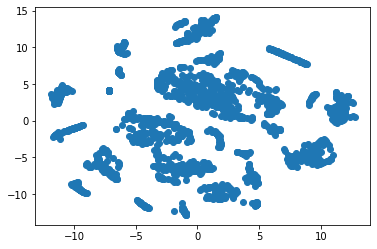

In [139]:
## learning rate

pca50 = PCA(n_components=50)
pca50.fit(log2_X_data)
log2_X_pca50 = pca50.transform(log2_X_data)

print(log2_X_data.shape)
print(log2_X_pca50.shape)

tsne = TSNE(n_components=2, perplexity=40, learning_rate=0.4)
tsne.fit(log2_X_pca50)
log2_X_tsne = tsne.fit_transform(log2_X_pca50)

print(log2_X_data.shape)
print(log2_X_tsne.shape)


# Scatter plot
plt.scatter(log2_X_tsne[:, 0], log2_X_tsne[:, 1])

# Display the plot
plt.show()

(2169, 45768)
(2169, 50)
(2169, 45768)
(2169, 2)


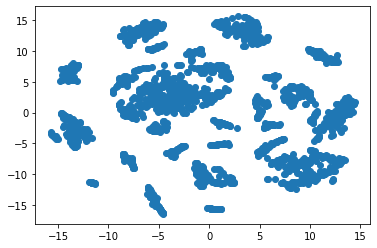

In [140]:
## learning rate

pca50 = PCA(n_components=50)
pca50.fit(log2_X_data)
log2_X_pca50 = pca50.transform(log2_X_data)

print(log2_X_data.shape)
print(log2_X_pca50.shape)

tsne = TSNE(n_components=2, perplexity=40, learning_rate=0.7)
tsne.fit(log2_X_pca50)
log2_X_tsne = tsne.fit_transform(log2_X_pca50)

print(log2_X_data.shape)
print(log2_X_tsne.shape)


# Scatter plot
plt.scatter(log2_X_tsne[:, 0], log2_X_tsne[:, 1])

# Display the plot
plt.show()

(2169, 45768)
(2169, 50)
(2169, 45768)
(2169, 2)


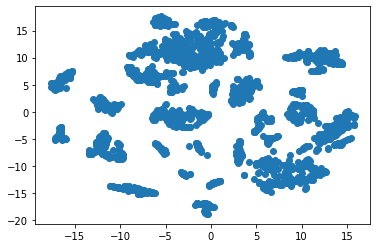

In [141]:
## learning rate

pca50 = PCA(n_components=50)
pca50.fit(log2_X_data)
log2_X_pca50 = pca50.transform(log2_X_data)

print(log2_X_data.shape)
print(log2_X_pca50.shape)

tsne = TSNE(n_components=2, perplexity=40, learning_rate=0.9)
tsne.fit(log2_X_pca50)
log2_X_tsne = tsne.fit_transform(log2_X_pca50)

print(log2_X_data.shape)
print(log2_X_tsne.shape)


# Scatter plot
plt.scatter(log2_X_tsne[:, 0], log2_X_tsne[:, 1])

# Display the plot
plt.show()

In [14]:
kmean = KMeans(n_clusters=18)
kmean.fit(log2_X_tsne)
log2_X_tsne_kmean = kmean.fit_transform(log2_X_tsne)

label_kmc = kmean.labels_
print(label_kmc)

[6 6 6 ... 5 5 5]


In [15]:
#kmc_columns = ['kmc_comp1', 'kmc_comp2']
X_kmc_df = pd.DataFrame(log2_X_tsne)
X_kmc_df['label_kmc'] = label_kmc
X_kmc_df.head(10)

# X_kmc_df[:][1]
# plt.scatter(X_kmc_df[:][0], X_kmc_df[:][1])
# plt.show()

,0,1,label_kmc
0,-2.204354,-20.850567,6
1,4.066771,-22.763062,6
2,3.464064,-23.449814,6
3,0.181245,-22.268064,6
4,-0.778017,-22.001404,6
5,0.676520,-22.489143,6
6,1.634140,-23.437315,6
7,-0.277242,-22.127762,6
8,3.282540,-23.174522,6
9,3.379312,-23.123661,6


### Logistics Regression

In [34]:
## Spliting training and test data
X_tn, X_te, Y_tn, Y_te = train_test_split(log2_X_data, label_kmc, random_state=0)

## Data standardization
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)


In [20]:
## Logistics Regression with L1, L2, and ElasticNet
clf_logi_l1 = LogisticRegression(C=0.01, penalty='l1',solver='liblinear')
clf_logi_l2 = LogisticRegression(penalty='l2', max_iter=100)
clf_logi_e = LogisticRegression(C=0.01, penalty='l1',solver='saga')

clf_logi_l1.fit(X_tn_std, Y_tn)
clf_logi_l2.fit(X_tn_std, Y_tn)
clf_logi_e.fit(X_tn_std, Y_tn)


/Users/jacob/opt/anaconda3/envs/6.86x/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/jacob/opt/anaconda3/envs/6.86x/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
pred_logistic_l1 = clf_logi_l1.predict(X_te_std)
pred_logistic_l2 = clf_logi_l2.predict(X_te_std)
pred_logistic_e = clf_logi_e.predict(X_te_std)

In [27]:
precision_l1 = precision_score(Y_te, pred_logistic_l1, average='weighted')
precision_l2 = precision_score(Y_te, pred_logistic_l2, average='weighted')
precision_e = precision_score(Y_te, pred_logistic_e, average='weighted')

In [28]:
print(precision_l1, precision_l2, precision_e)

0.8757431603932525 0.9587293404692796 0.8909949516631896


In [31]:
class_report_l1 = classification_report(Y_te, pred_logistic_l1)
print(class_report_l1)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       0.95      1.00      0.97        53
           2       0.00      0.00      0.00        22
           3       1.00      0.95      0.98        21
           4       0.97      0.97      0.97        38
           5       1.00      1.00      1.00        24
           6       0.98      0.98      0.98        46
           7       1.00      0.83      0.91         6
           8       0.97      0.97      0.97        39
           9       1.00      1.00      1.00        25
          10       0.87      0.72      0.79        36
          11       1.00      0.95      0.97        20
          12       1.00      0.91      0.95        34
          13       0.72      0.47      0.57        38
          14       0.94      1.00      0.97        31
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        27
          17       0.46    

/Users/jacob/opt/anaconda3/envs/6.86x/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
class_report_l2 = classification_report(Y_te, pred_logistic_l2)
print(class_report_l2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        53
           2       1.00      0.23      0.37        22
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00        24
           6       1.00      0.96      0.98        46
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00        39
           9       1.00      1.00      1.00        25
          10       0.91      0.86      0.89        36
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        34
          13       0.94      0.87      0.90        38
          14       1.00      1.00      1.00        31
          15       1.00      1.00      1.00        20
          16       0.93      1.00      0.96        27
          17       0.60    

In [33]:
class_report_e = classification_report(Y_te, pred_logistic_e)
print(class_report_e)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.91      1.00      0.95        53
           2       0.00      0.00      0.00        22
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00        24
           6       0.94      0.98      0.96        46
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00        39
           9       1.00      1.00      1.00        25
          10       0.90      0.78      0.84        36
          11       1.00      1.00      1.00        20
          12       0.97      0.97      0.97        34
          13       0.89      0.45      0.60        38
          14       1.00      1.00      1.00        31
          15       1.00      1.00      1.00        20
          16       1.00      0.74      0.85        27
          17       0.44    

/Users/jacob/opt/anaconda3/envs/6.86x/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
coef_l2 = clf_logi_l2.coef_
#print(coef_l2)
# print(coef_l2.shape)
label_l2 = clf_logi_l2.classes_
print(label_l2)

coef_l2_abs = np.abs(coef_l2)
print(coef_l2_abs)

coef_l2_abs_argsorted = np.argsort(coef_l2_abs)
print(coef_l2_abs_argsorted.shape)
print(coef_l2_abs_argsorted)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
[[0.00081751 0.         0.00044657 ... 0.         0.         0.        ]
 [0.00047324 0.         0.00292884 ... 0.         0.         0.        ]
 [0.00020564 0.         0.00094557 ... 0.         0.         0.        ]
 ...
 [0.0026889  0.         0.00059633 ... 0.         0.         0.        ]
 [0.00180331 0.         0.00030856 ... 0.         0.         0.        ]
 [0.00201941 0.         0.00028007 ... 0.         0.         0.        ]]
(18, 45768)
[[45767  6568  6569 ... 39936  7456 40310]
 [45767 23222 23219 ... 27643  4357 37125]
 [45767 20057 20056 ... 36383 11017 13993]
 ...
 [45767 20897 20891 ... 37072 44927 34673]
 [45767 24740 24739 ...  5780  5197 40475]
 [45767 20055 20050 ... 22091 42476  2650]]


In [126]:
rank = clf_logi_l2.coef_[0]
rank_abs = np.abs(rank)
print(rank_abs)

rank_sorted = np.argsort(rank_abs)[::-1]
print(rank_sorted)

sorted_data = log2_X_data.T[rank_sorted]
print(sorted_data)

[0.00081751 0.         0.00044657 ... 0.         0.         0.        ]
[40310  7456 39936 ...  6569  6568 45767]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:

# # tune regularization for multinomial logistic regression
# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.linear_model import LogisticRegression
# from matplotlib import pyplot
 
# # get the dataset
# def get_dataset():
# 	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1, n_classes=3)
# 	return X, y
 
# # get a list of models to evaluate
# def get_models():
# 	models = dict()
# 	for p in [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0]:
# 		# create name for model
# 		key = '%.4f' % p
# 		# turn off penalty in some cases
# 		if p == 0.0:
# 			# no penalty in this case
# 			models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none')
# 		else:
# 			models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=p)
# 	return models
 
# # evaluate a give model using cross-validation
# def evaluate_model(model, X, y):
# 	# define the evaluation procedure
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# 	# evaluate the model
# 	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# 	return scores


In [ ]:
# with open(cwd + '/p2_unsupervised/X.npy', 'rb') as file:
#     X_data = np.load(file)
#     print(X_data.shape)

# with open(cwd + '/p2_unsupervised/X.npy', 'rb') as file:
#     X_data = np.load(file)
#     print(X_data.shape)

In [ ]:
# # define dataset
# X, y = get_dataset()
# # get the models to evaluate
# models = get_models()
# # evaluate the models and store results
# results, names = list(), list()
# for name, model in models.items():
# 	# evaluate the model and collect the scores
# 	scores = evaluate_model(model, X, y)
# 	# store the results
# 	results.append(scores)
# 	names.append(name)
# 	# summarize progress along the way
# 	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=names, showmeans=True)
# pyplot.show()